<a href="https://colab.research.google.com/github/ellaclauz/EXAMPLES_KNEARESTNEIGHBORS/blob/main/BANKNOTE_EXAMPLE_FOR_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example of Nearest Neighbors

We’ll look at predicting whether a banknote (e.g., a $20 bill) is counterfeit or legitimate. Researchers have put together a data set, based on photographs of many individual banknotes: some counterfeit, some legitimate. They computed a few numbers from each image, using techniques that we won’t worry about for this course. So, for each banknote, we know a few numbers that were computed from a photograph of it as well as its class (whether it is counterfeit or not). Let’s load it into a dataframe and take a look.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import files
uploaded= files.upload()

Saving banknote.csv to banknote.csv


In [4]:
data= pd.read_csv('banknote.csv')
data.head()

,WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Exploratory Data Analysis

In [5]:
data.shape

(1372, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WaveletVar   1372 non-null   float64
 1   WaveletSkew  1372 non-null   float64
 2   WaveletCurt  1372 non-null   float64
 3   Entropy      1372 non-null   float64
 4   Class        1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
data["Class"].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: Class, dtype: float64

Let’s look at whether the first two columns tell us anything about whether the banknote is counterfeit or not. Create a scatterplot.

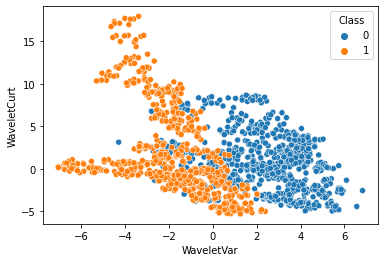

In [8]:
sn.scatterplot(x="WaveletVar", y="WaveletCurt", data=data, hue="Class")
plt.show()

Based on the scatterplot above, those two measurements do seem helpful for predicting whether the banknote is counterfeit or not. However, in this example you can now see that there is some overlap between the orange cluster and the blue cluster. This indicates that there will be some images where it’s hard to tell whether the banknote is legitimate based on just these two numbers. Still, you could use a k-nearest neighbor classifier to predict the legitimacy of a banknote.

The patterns that show up in the data can get pretty wild. For instance, here’s what we’d get if used a different pair of measurements from the images:

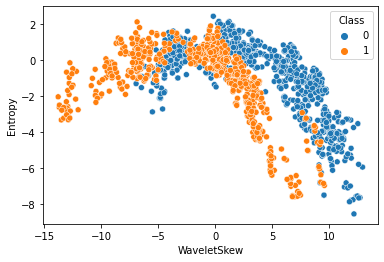

In [9]:
sn.scatterplot(x="WaveletSkew", y="Entropy", data=data, hue="Class")
plt.show()

There does seem to be a pattern, but it’s a pretty complex one. Nonetheless, the k-nearest neighbors classifier can still be used and will effectively “discover” patterns out of this. This illustrates how powerful machine learning can be: it can effectively take advantage of even patterns that we would not have anticipated, or that we would have thought to “program into” the computer.

So far we've been plotting exactly 2 attributes that we can use to help us make our prediction. What if we have more than 2? For instance, what if we have 3 attributes?

You can make a 3-dimensional scatterplot, instead of a 2-dimensional plot. You can still use the k-nearest neighbors classifier, but now computing distances in 3 dimensions instead of just 2. 

In fact, there’s nothing special about 2 or 3. If you have 4 attributes, you can use the k-nearest neighbors classifier in 4 dimensions. 5 attributes? Work in 5-dimensional space. And no need to stop there! This all works for arbitrarily many attributes; you just work in a very high dimensional space. It gets wicked-impossible to visualize, but that’s OK. The computer algorithm generalizes very nicely: all you need is the ability to compute the distance.

For instance, let’s see what happens if we try to predict whether a banknote is counterfeit or not using 3 of the measurements, instead of just 2. Here’s what you get:

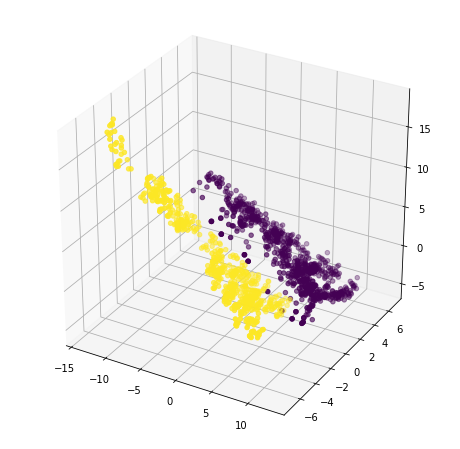

In [10]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(data["WaveletSkew"], 
           data["WaveletVar"], 
           data["WaveletCurt"], 
           c=data["Class"])
plt.show()

Awesome! With just 2 attributes, there was some overlap between the two clusters (which means that the classifier was bound to make some mistakes for points in the overlap). But when we use these 3 attributes, the two clusters have almost no overlap. In other words, a classifier that uses these 3 attributes will be more accurate than one that only uses the 2 attributes.

This is a general phenomenom in classification. Each attribute can potentially give you new information, so more attributes sometimes helps you build a better classifier. Of course, the cost is that now we have to gather more information to measure the value of each attribute, but this cost may be well worth it if it significantly improves the accuracy of our classifier.

To sum up: you now know how to use k-nearest neighbor classification to predict the answer to a yes/no question, based on the values of some attributes, assuming you have a training set with examples where the correct prediction is known. The general roadmap is this:

1. Identify some attributes that you think might help you predict the answer to the question.

2. Gather a training set of examples where you know the values of the attributes as well as the correct prediction.

3. To make predictions in the future, measure the value of the attributes and then use k-nearest neighbor classification to predict the answer to the question.

## Training and Testing Split

### Isolate the `y` variable.
This is also known as the outcome variable / the target variable / the dependent variable. Essentially, this is the variable that you want to predict.

In [12]:
y = data["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Isolate the `X` variables.
Also known as the features / the independent variables. Essentially, these are the variables that you want to use to predict `y`.

In [14]:
X = data.drop(columns="Class")
X.head()

,WaveletVar,WaveletSkew,WaveletCurt,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WaveletVar   1372 non-null   float64
 1   WaveletSkew  1372 non-null   float64
 2   WaveletCurt  1372 non-null   float64
 3   Entropy      1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [16]:
X.columns

Index(['WaveletVar', 'WaveletSkew', 'WaveletCurt', 'Entropy'], dtype='object')

In [17]:
X=X[["WaveletVar", "WaveletSkew", "WaveletCurt"]]

In [18]:
X.head()

,WaveletVar,WaveletSkew,WaveletCurt
0,3.62160,8.6661,-2.8073
1,4.54590,8.1674,-2.4586
2,3.86600,-2.6383,1.9242
3,3.45660,9.5228,-4.0112
4,0.32924,-4.4552,4.5718


### Split `X` and `y` into training and testing sets.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Check what the training and testing sets look like.

In [20]:
X_train.head()

,WaveletVar,WaveletSkew,WaveletCurt
662,2.9736,8.7944,-3.6359
512,2.6648,10.7540,-3.3994
1193,-3.7573,-8.2916,10.3032
682,3.7321,-3.8840,3.3577
1313,-1.5078,-7.3191,7.8981


In [21]:
X_test.head()

,WaveletVar,WaveletSkew,WaveletCurt
1023,-1.7713,-10.766500,10.21840
642,5.1321,-0.031048,0.32616
1196,-2.0149,3.687400,-1.93850
31,1.4884,3.627400,3.30800
253,5.2868,3.257000,-1.37210


In [22]:
y_train.head()

662     0
512     0
1193    1
682     0
1313    1
Name: Class, dtype: int64

In [23]:
y_test.head()

1023    1
642     0
1196    1
31      0
253     0
Name: Class, dtype: int64

Check the shapes of the training and testing sets.

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 3), (343, 3), (1029,), (343,))

## Implement K-NN

### Create a `KNeighborsClassifier` object.

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

### Fit the `KNeighborsClassifier` to the training data.

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Use the fitted `KNeighborsClassifier` to predict on the training set.

Get the predictions on the training set.

In [27]:
preds_train = knn.predict(X_train)

Check data types of the predictions and the true values for training set.

In [28]:
type(preds_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

How to compare predictions to true values for training set:

In [29]:
preds_train == y_train

662     True
512     True
1193    True
682     True
1313    True
        ... 
763     True
835     True
1216    True
559     True
684     True
Name: Class, Length: 1029, dtype: bool

Compute accuracy of predictions for training set:

In [30]:
knn.score(X_train, y_train)

1.0

### Use the fitted `KNeighborsClassifier` to predict on the testing set.

Get the predictions on the testing set.

In [31]:
preds_test = knn.predict(X_test)

What do the predictions on the testing set look like:

In [32]:
preds_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

What do the true values in the testing set look like:

In [34]:
y_test

1023    1
642     0
1196    1
31      0
253     0
       ..
866     1
361     0
703     0
328     0
530     0
Name: Class, Length: 343, dtype: int64

Compute accuracy of predictions for testing set: 

In [33]:
knn.score(X_test, y_test)

1.0